# The big Question

use machine learning to process and transformPima indian data to create a model. This model must predict which people are likely to develop Diabetes with 80% or greater accuracy.

## A little dive into the data

- Two classes either True (1) and not False (0)
- supervised learning problem
- **Classification** problem since target is categorical
- 768 **instances**
- 9 **features** (pregnant, glucose, bp, skin, insulin, bmi, pedigree, age, diabetes)
- **target** variable is the diabetes

## Data Exploration

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'diabetes']
df = pd.read_csv("pima-indians-diabetes.data", header=None, names=col_names)

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.isnull().values.any()


False

### Correlated Feature Check

Helper function that displays correlation by color.  Red is most correlated, Blue least.

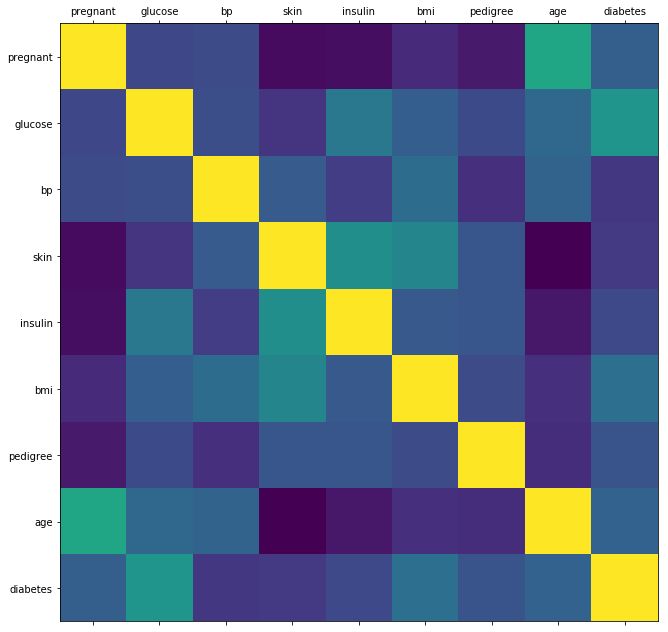

In [7]:
corr = df.corr()    
fig, ax = plt.subplots(figsize=(11, 11))
ax.matshow(corr)   
plt.xticks(range(len(corr.columns)), corr.columns)  
plt.yticks(range(len(corr.columns)), corr.columns) 
plt.show()

In [8]:
corr

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The correlations look good.  There appear to be no coorelated columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
diabetes    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Observation

1. There are no missung values.
2. Two attributes are float64 datatype while the others are int64.
3. All attributes are numerical.

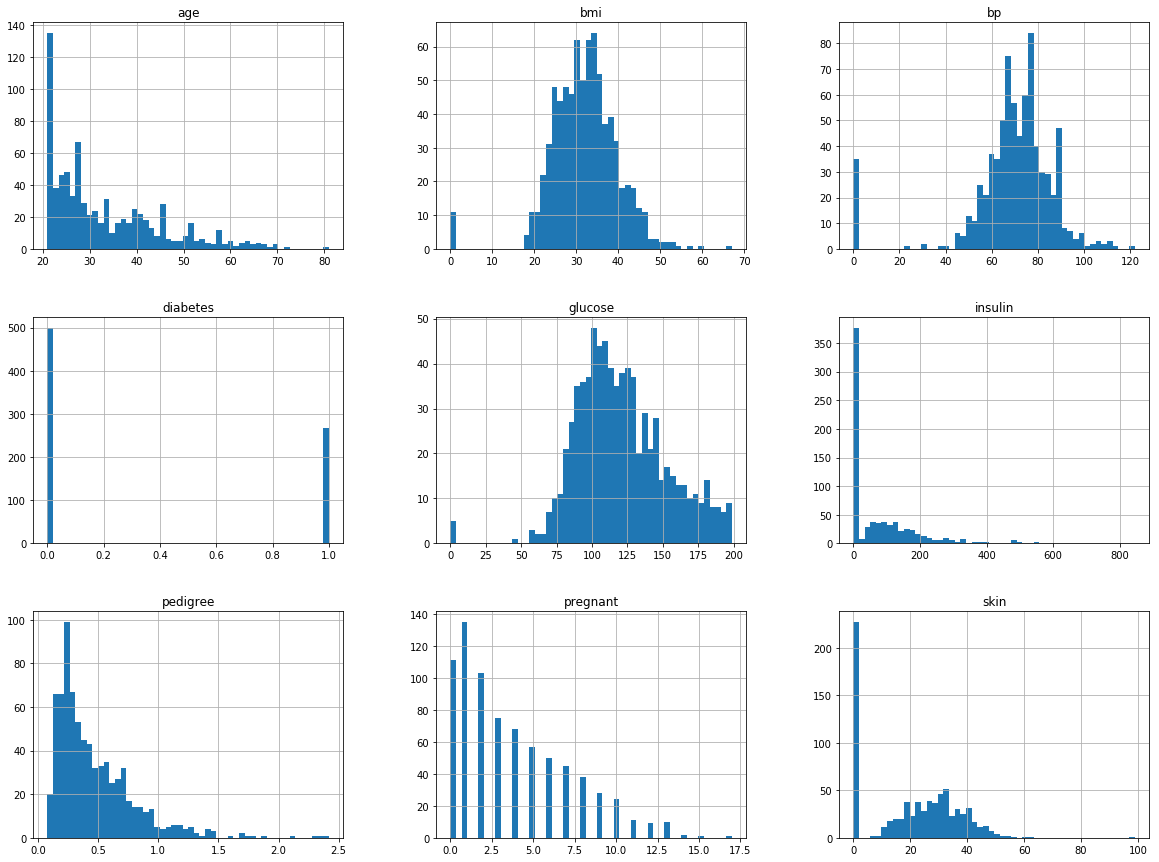

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

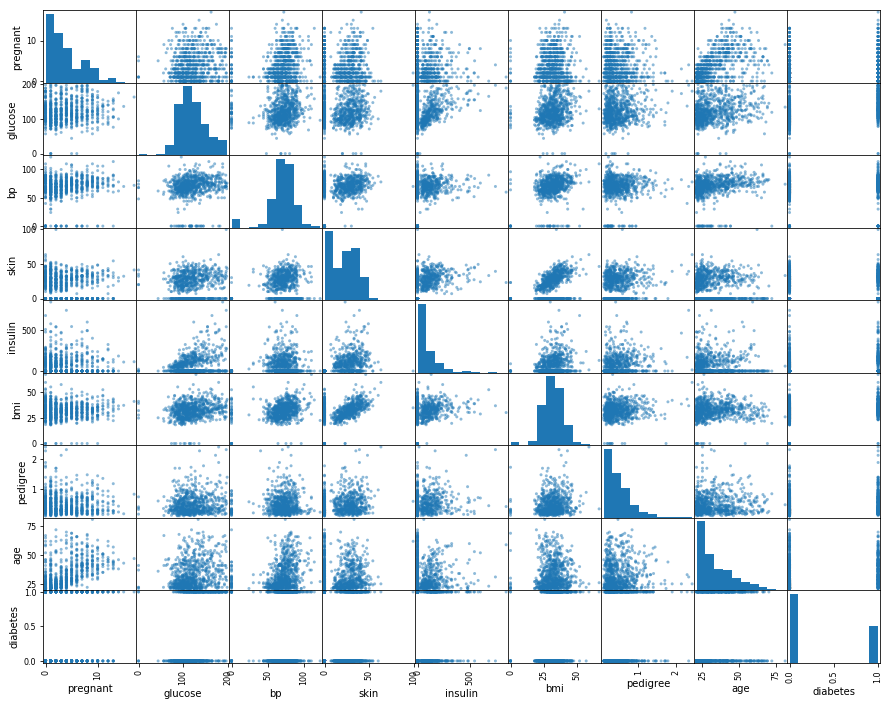

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[col_names], figsize=(15, 12))
plt.show()

In [12]:
# checking class distribution
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


Good distribution of true and false cases.  No special work needed.

## Train, val, Test split

In [13]:
from sklearn.model_selection import train_test_split
X= df.drop('diabetes', axis=1).values
y= df['diabetes'].copy().values
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(491, 8)
(123, 8)
(154, 8)
(491,)
(123,)
(154,)


#### Hidden Missing Values

In [15]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# it is not possible for this features to assume the value 0 therefore we'd assume they are missing value
print('Hidden missing values denoted with 0 \n')
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['pregnant'] == 0])))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['skin'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['pedigree'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

Hidden missing values denoted with 0 

# rows in dataframe 768
# rows missing glucose_conc: 111
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer as SimpleImputer

pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values=0,strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
X_train_prep = pipeline.fit_transform(X_train)
X_val_prep = pipeline.fit_transform(X_val)
X_test_prep = pipeline.fit_transform(X_test)

In [20]:
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)

(491, 8)
(123, 8)
(154, 8)


## create models

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score

In [25]:
k_range = list(range(1, 50))
scores = []
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_prep, y_train)
    y_pred = knn.predict(X_val_prep)
    scores.append(metrics.accuracy_score(y_val, y_pred))
    cv = cross_val_score(knn, X_train_prep, y_train, cv=10, scoring='accuracy')
    cv_scores.append(cv.mean())

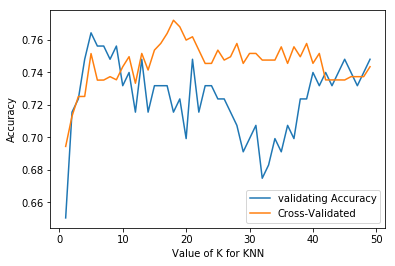

In [26]:
# plot the relationship between K and validating accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
# plot the relationship between K and Cross-Validated Accuracy
plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend(['validating Accuracy', 'Cross-Validated'])

#### From this the best of the knn is k= 5

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_prep, y_train)
joblib.dump(knn, 'knn.pkl')
y_pred = knn.predict(X_val_prep)
knn_accuracy= metrics.accuracy_score(y_val, y_pred)
knn_c_matrix = confusion_matrix(y_val, y_pred)
print(knn_accuracy*100)
print(knn_c_matrix)

76.42276422764228
[[76  5]
 [24 18]]


In [77]:
models = [('log_reg', LogisticRegression()), ('tree_clf', DecisionTreeClassifier()),
         ('forest_clf', RandomForestClassifier()), ('svm_clf', SVC(probability= True)),
         ('sgd_clf' ,SGDClassifier(loss='log')), ('nb_clf', GaussianNB())]
results= []
names= []
evale= []
cme= []
for name, model in models:
    model.fit(X_train_prep, y_train)
    joblib.dump(model, name +'.pkl')
    accuracy= model.score(X_train_prep, y_train)*100
    val_accuracy= model.score(X_val_prep, y_val)*100
    cv= cross_val_score(model, X_train_prep, y_train,
                            scoring='accuracy', cv=10)     
    y_pred = model.predict(X_val_prep)
    pre= precision_score(y_val, y_pred)
    recall= recall_score(y_val, y_pred)
    y_scores = model.predict_proba(X_val_prep)[:, 1]
    auc= roc_auc_score(y_val, y_scores)    
    results.append([accuracy, pre, recall, auc, cv])
    names.append(name)
    eval= "%s:\t%f\t%f\t%f\t%f\t%f\t%f (%f)" % (name, accuracy, val_accuracy, pre*100, recall*100, auc*100, cv.mean()*100, cv.std()*100)
    evale.append(eval)
    y_pred = model.predict(X_val_prep)
    c_matrix = confusion_matrix(y_val, y_pred)
    cme.append([name, c_matrix])

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [79]:
print("""\t\t training\t validating
NAME\t\t ACCURACY\tACCURACY\tPRECISION\tRECALL\t\t   AUC\t\t CV_MEAN (CV_STD)""") 
print('='*117)
for eval in evale:
    print(eval)
    print('='*117)

		 training	 validating
NAME		 ACCURACY	ACCURACY	PRECISION	RECALL		   AUC		 CV_MEAN (CV_STD)
log_reg:	75.967413	76.422764	69.696970	54.761905	84.891240	74.738776 (4.033366)
tree_clf:	100.000000	71.544715	59.459459	52.380952	66.931217	69.844898 (5.202915)
forest_clf:	98.981670	73.170732	65.517241	45.238095	78.542034	73.934694 (2.957322)
svm_clf:	83.299389	73.983740	66.666667	47.619048	81.804821	74.951020 (2.565010)
sgd_clf:	71.894094	70.731707	58.823529	47.619048	72.868901	69.028571 (10.666811)
nb_clf:	74.745418	73.983740	62.500000	59.523810	79.805996	73.326531 (6.117038)


In [80]:
for cm in cme:
    print(cm)
    print('='*75)

['log_reg', array([[71, 10],
       [19, 23]], dtype=int64)]
['tree_clf', array([[66, 15],
       [20, 22]], dtype=int64)]
['forest_clf', array([[71, 10],
       [23, 19]], dtype=int64)]
['svm_clf', array([[71, 10],
       [22, 20]], dtype=int64)]
['sgd_clf', array([[67, 14],
       [22, 20]], dtype=int64)]
['nb_clf', array([[66, 15],
       [17, 25]], dtype=int64)]


C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better fo

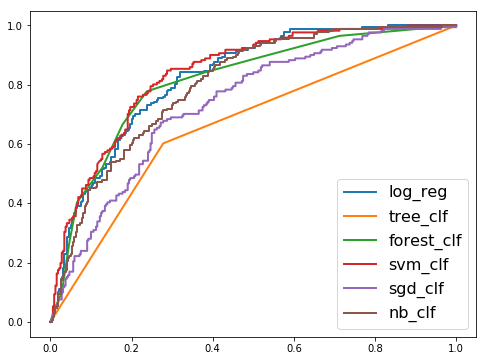

In [105]:

plt.figure(figsize=(8, 6))
for name, model in models:
    model.fit(X_train_prep, y_train)
    y_scores = cross_val_predict(model, X_train_prep, y_train, cv=3,
 method="predict_proba")[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train,y_scores)
    plt.plot(fpr, tpr, linewidth=2, label=name)
    plt.legend(loc="lower right", fontsize=16)
plt.show()

#fpr, tpr, thresholds = roc_curve(y_train, y_scores)


#### from this the Logistics regression classifier did best

In [84]:
log_reg = joblib.load('log_reg.pkl')
log_reg.fit(X_train_prep, y_train)
y_pred = log_reg.predict(X_val_prep)
accuracy= metrics.accuracy_score(y_val, y_pred)
c_matrix = confusion_matrix(y_val, y_pred)
print(accuracy*100)
print(c_matrix)

76.42276422764228
[[71 10]
 [19 23]]


C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
# print the first 25 true and predicted responses
print('True:', y_val[0:30])
print('Pred:', y_pred[0:30])

True: [1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0]
Pred: [1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0]


i would choose the log_reg model for the following reasons

- The knn model with k=5 is too complex and since simpler is better i'd choose logreg
- From the classification matrix the error the knn model is making on the negatives (i.e the FN) is too much compared to that of the logreg.

### our model is therefore log_reg

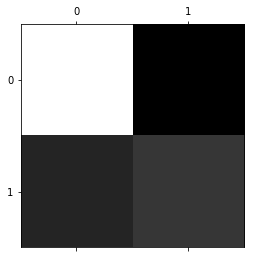

In [88]:
#lets take a look at image representation of the confusion matrix for RandomForestClassifier Model
#using the matplotlib's matshow() function

plt.matshow(c_matrix, cmap=plt.cm.gray)

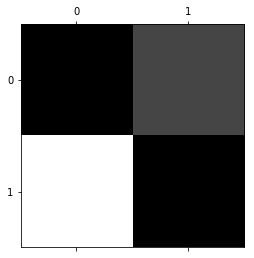

In [89]:
#focusing on only the errors
row_sums = c_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = c_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

from the representation shown above it shows that the logregClassifier generalizes well the error it is making is predicting 0 confusing it to be 1 and sometimes predicting 1 confusing it to be 0

In [90]:
from sklearn.metrics import classification_report 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        81
           1       0.78      0.43      0.55        42

   micro avg       0.76      0.76      0.76       123
   macro avg       0.77      0.68      0.70       123
weighted avg       0.77      0.76      0.74       123



the recall for 1 is very very low i guess thats because we have lower amount of 1 in the dataset

In [95]:
y_scores = cross_val_predict(log_reg, X_train_prep, y_train, cv=3,
 method="predict_proba")[:, 1]

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


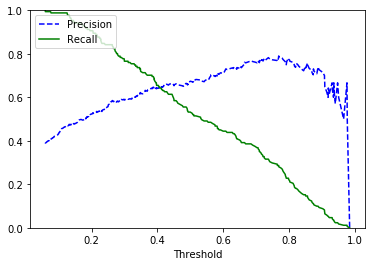

In [96]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

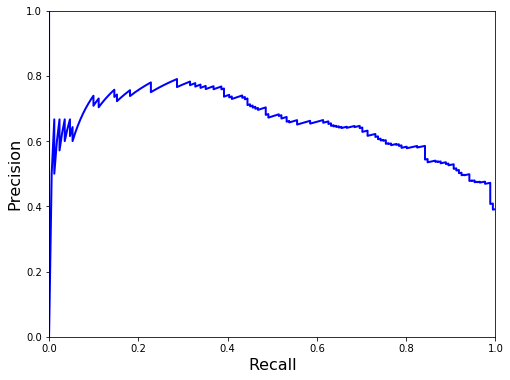

In [97]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

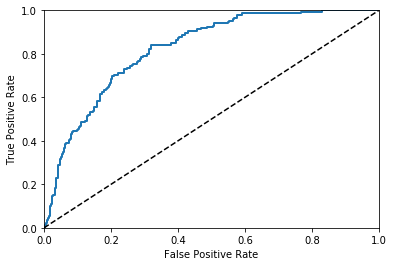

In [98]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

## Hyperparameter tuning

In [127]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'penalty': ['l1', 'l2'],
                     'C': np.logspace(-4, 4, 20)}]

grid_search = GridSearchCV(log_reg, param_grid, cv=5,
                       scoring='precision_macro' )
grid_search.fit(X_train_prep, y_train)

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spe

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bing\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision_macro', verbose=0)

In [128]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.748548575141962
{'C': 0.08858667904100823, 'penalty': 'l1'}
LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [129]:
#grid_search.best_estimator
y_pred = grid_search.best_estimator_.predict(X_val_prep)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        81
           1       0.74      0.62      0.68        42

   micro avg       0.80      0.80      0.80       123
   macro avg       0.78      0.75      0.76       123
weighted avg       0.79      0.80      0.79       123



In [132]:
print(roc_auc_score(y_val, y_pred))

0.753968253968254


In [130]:
final_model= grid_search.best_estimator_
joblib.dump(final_model, 'final_model')

['final_model']